In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import sys
sys.path.insert(0,"../src/")

from linear_regression import *
from main import *

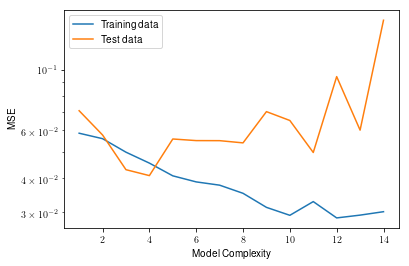

In [15]:
n = 300
x = np.random.uniform(0, 1, n)
y = np.random.uniform(0, 1, n)
z = FrankeFunction(x, y) + np.random.normal(0, 1, n) * 0.2

degrees = np.arange(1, 15)
MSE_train = np.zeros(len(degrees))
MSE_test = np.zeros(len(degrees))

for i, deg in enumerate(degrees):
    X = design_matrix_2D(x, y, deg)
    X_train, X_test, z_train, z_test = train_test_split(X, z, test_size = 0.2)
    #beta = OLS_SVD_2D(X_train, z_train)
    beta = np.linalg.pinv(X_train.T @ X_train) @ X_train.T @ z_train
    
    MSE_train[i] = MSE(z_train, X_train @ beta)
    MSE_test[i] = MSE(z_test, X_test @ beta)
     
plt.semilogy(degrees, MSE_train, label = "Training data")
plt.semilogy(degrees, MSE_test, label = "Test data")
plt.xlabel("Model Complexity")
plt.ylabel("MSE")
plt.legend()